In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {'ID': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10'],
        'job': ['unemployed', 'services', 'management', 'management', 'blue-collar', 'management', 'self-employed', 'technician', 'entrepreneur', 'services'],
        'marital': ['married', 'married', 'single', 'married', 'single', 'single', 'married', 'married', 'married', 'married'],
        'education': ['primary', 'secondary', 'tertiary', 'tertiary', 'secondary', 'tertiary', 'tertiary', 'secondary', 'tertiary', 'primary'],
        'default': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
        'housing': ['no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes'],
        'loan': ['no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes'],
        'contact': ['cellular', 'cellular', 'cellular', 'unknown', 'unknown', 'cellular', 'cellular', 'cellular', 'unknown', 'cellular']}


emps = pd.DataFrame(data)

In [3]:
emps.head(10)

,ID,job,marital,education,default,housing,loan,contact
0,P1,unemployed,married,primary,No,no,no,cellular
1,P2,services,married,secondary,No,yes,yes,cellular
2,P3,management,single,tertiary,No,no,no,cellular
3,P4,management,married,tertiary,No,yes,yes,unknown
4,P5,blue-collar,single,secondary,No,yes,no,unknown
5,P6,management,single,tertiary,No,no,yes,cellular
6,P7,self-employed,married,tertiary,No,yes,no,cellular
7,P8,technician,married,secondary,No,yes,no,cellular
8,P9,entrepreneur,married,tertiary,No,yes,no,unknown
9,P10,services,married,primary,No,yes,yes,cellular


##### [Problem 1] Distance between P4 and P5 and the distance between P4 and P9. Is P4 closer to P5 or P9?

In [8]:
#we compare all nominal columns (categorical/not numeric)
nominal_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

def scaled_hamming(first_id, second_id):
    row_p4 = emps[emps['ID']==first_id][nominal_cols].iloc[0]
    row_p5 = emps[emps['ID']==second_id][nominal_cols].iloc[0]

    mismatch = (row_p4 != row_p5).sum()
    total_col = len(nominal_cols)
    return mismatch/total_col

scaled_dist_P4_5 = scaled_hamming("P4", "P5")
scaled_dist_P4_9 = scaled_hamming("P4", "P9")

print("Scaled Hamming Distance between P4 and P5: ", scaled_dist_P4_5, 
      "\nScaled Hamming Distance between P4 and P9: ", scaled_dist_P4_9)

Scaled Hamming Distance between P4 and P5:  0.5714285714285714 
Scaled Hamming Distance between P4 and P9:  0.2857142857142857


##### [Problem 2] Manhattan & Euclidean Distances

##### [2.1] Distance between O1 and O2 using the Manhattan distance.
The Manhattan Distance between two points (X1, Y1) and (X2, Y2) is given by |X1 – X2| + |Y1 – Y2|.

In [12]:
from scipy.spatial.distance import cityblock

# Values for O1 and O2
O1 = np.array([88, 47, 32, 6])
O2 = np.array([97, 63, 18, 4])

manhattan_dist = cityblock(O1, O2)

print("Manhattan distance:", manhattan_dist)

Manhattan distance: 41


##### [2.2] Distance between O1 and O2 using the Euclidean distance.

In [15]:
from scipy.spatial.distance import euclidean

euclidean_dist = euclidean(O1, O2)
print("Euclidean distance:", euclidean_dist)

Euclidean distance: 23.173260452512935


##### [Problem 3] K Nearest Neighbors

In [18]:
accs = pd.read_csv('accidents1000.csv')

In [20]:
accs.head()

,RushHour,WRK_ZONE,WKDY,INT_HWY,LGTCON_day,LEVEL,SPD_LIM,SUR_COND_dry,TRAF_WAY_two_way,WEATHER_adverse,MAX_SEV
0,1,0,1,1,0,1,70,0,0,1,no-injury
1,1,0,1,0,0,0,70,0,0,1,no-injury
2,1,0,1,0,0,0,65,0,0,1,non-fatal
3,1,0,1,0,0,0,55,0,1,0,non-fatal
4,1,0,0,0,0,0,35,0,0,1,no-injury


##### [3.1] Training and holdout partitions on the data set, holding out 1/3 of the data.

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
X = accs.drop(columns=['MAX_SEV'])
y = accs['MAX_SEV']

# Stratified split: 2/3 train, 1/3 hold-out (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify = y, random_state = 42)

##### [3.2] k-Nearest Neighbor model. Be sure to center and scale the data. Select an optimal value of k. Use the optimal model to make predictions on the holdout data. Generate a confusion matrix and compute the accuracy.

In [28]:
from sklearn.preprocessing import StandardScaler

#centering and scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
#finding optimal k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

#odd k value from 1 to 29
k_values = list(range(1,30,2))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    #implementing cross validation over all k values from 1 to 29 and scoring based on accuracy
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')

    #finding the mean of the accuracy score
    cv_scores.append(scores.mean())

print("Cross Validation Scores\n", cv_scores) 
#pulls the k value where cv_score is highest -- 27 has the highest cv_score of 0.5299412030755315
best_k = k_values[np.argmax(cv_scores)]
print("Optimal k:", best_k)

Cross Validation Scores
 [0.4654454997738579, 0.4895296246042514, 0.5045002261420172, 0.4940072365445499, 0.49549977385798283, 0.4954319312528267, 0.5059927634554501, 0.5179556761646313, 0.5149932157394843, 0.5090456806874717, 0.5150384441429218, 0.5178878335594753, 0.5253957485300769, 0.5299412030755315, 0.5074400723654454]
Optimal k: 27


In [32]:
#find optimal model and predict on holdout set
knn_best_model = KNeighborsClassifier(n_neighbors=best_k)
knn_best_model.fit(X_train_scaled, y_train)

y_pred = knn_best_model.predict(X_test_scaled)

In [34]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred, labels=knn_best_model.classes_)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[ 0  0  3]
 [ 0 83 81]
 [ 0 75 91]]
Accuracy: 0.5225225225225225


##### [Problem 4] Logistic Regression

In [37]:
accs.head()

,RushHour,WRK_ZONE,WKDY,INT_HWY,LGTCON_day,LEVEL,SPD_LIM,SUR_COND_dry,TRAF_WAY_two_way,WEATHER_adverse,MAX_SEV
0,1,0,1,1,0,1,70,0,0,1,no-injury
1,1,0,1,0,0,0,70,0,0,1,no-injury
2,1,0,1,0,0,0,65,0,0,1,non-fatal
3,1,0,1,0,0,0,55,0,1,0,non-fatal
4,1,0,0,0,0,0,35,0,0,1,no-injury


##### [4.1] Remove the observations with MAX_SEV = no-injury

In [40]:
accs_sub = accs[accs['MAX_SEV']!='no-injury']

In [42]:
accs_sub['MAX_SEV'].value_counts()

MAX_SEV
non-fatal    499
fatal          8
Name: count, dtype: int64

##### [4.2] Generate training and holdout partitions on the remaining data. Use 1/3 of the data in the holdout.

In [45]:
X = accs_sub.drop(columns=['MAX_SEV'])
y = accs_sub['MAX_SEV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

##### [4.3] Fit a logistic regression model. Use the model to make predictions on the holdout data. Generate a confusion matrix and compute the accuracy and the F-score.

In [48]:
#fitting logistic regression on over-samples data
from sklearn.linear_model import LogisticRegression

#center/scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#logistic regression model before over/under sampling
logreg_before = LogisticRegression(max_iter=1000, random_state=42)
logreg_before.fit(X_train_scaled, y_train)

#predict on holdout data
y_pred_before = logreg_before.predict(X_test_scaled)

In [50]:
#confusion matrix and accuracy scores
from sklearn.metrics import f1_score

cm = confusion_matrix(y_test, y_pred_before, labels=logreg_before.classes_)
accuracy = accuracy_score(y_test, y_pred_before)
fscore = f1_score(y_test, y_pred_before, average='macro')

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("F-score:", fscore)

Confusion Matrix:
 [[  0   3]
 [  0 166]]
Accuracy: 0.9822485207100592
F-score: 0.4955223880597015


##### [4.6] Apply the method (over-sampling or under-sampling) that is more likely to be helpful to the training data you already created in step (2)

In [53]:
#Oversample the minority class in training set -- fatal class
from imblearn.over_sampling import RandomOverSampler

#makes both classes 50/50 
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

print("Before oversampling:", y_train.value_counts())
print("\nAfter oversampling:", pd.Series(y_train_over).value_counts())

Before oversampling: MAX_SEV
non-fatal    333
fatal          5
Name: count, dtype: int64

After oversampling: MAX_SEV
non-fatal    333
fatal        333
Name: count, dtype: int64


In [55]:
#scale oversampled training data
X_train_over_scaled = scaler.fit_transform(X_train_over)

#predict on the scaled test set
logreg_after = LogisticRegression(max_iter=1000, random_state=42)
logreg_after.fit(X_train_over_scaled, y_train_over)
y_pred_after = logreg_after.predict(X_test_scaled)  

In [57]:
#confusion matrix and accuracy scores
cm = confusion_matrix(y_test, y_pred_after, labels=logreg_after.classes_)
accuracy = accuracy_score(y_test, y_pred_after)
fscore = f1_score(y_test, y_pred_after, average='macro')

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("F-score:", fscore)

Confusion Matrix:
 [[  1   2]
 [ 65 101]]
Accuracy: 0.6035502958579881
F-score: 0.3899574376380583


##### [4.9]  Variable importance for the over-sampling model

In [60]:
features = X.columns
coefficient = logreg_after.coef_[0]
abs_coefficient = np.abs(coefficient)

In [62]:
imp_cols = pd.DataFrame({'Feature': features, 'Coefficient': coefficient,'Abs_Coefficient': abs_coefficient}).sort_values('Abs_Coefficient', ascending=False)

In [64]:
imp_cols.head(3)

,Feature,Coefficient,Abs_Coefficient
2,WKDY,1.923044,1.923044
9,WEATHER_adverse,1.639861,1.639861
6,SPD_LIM,-1.284335,1.284335


##### [Problem 5] Multiple Linear Regression Model

In [67]:
powder = pd.read_csv('powdermetallurgy.csv')
powder.head()

,Formation Method,Compaction Method,Compaction Pressure,Sintering Time,Sintering Temp C,Sintering Method,Powder Source,Shrinkage
0,Die,Cold,90,27.48,1133,Vacuum,N,0.19
1,Extrusion,Cold,90,27.48,1143,Atmosphere,D,-0.37
2,Extrusion,Cold,100,27.48,1121,Atmosphere,D,-0.16
3,Extrusion,Cold,95,27.48,1122,Atmosphere,D,0.41
4,Extrusion,Cold,85,27.48,1118,Atmosphere,D,-0.65


##### [5.1] Training and holdout partitions on the data set. Use 1/3 of the data in the holdout.

In [70]:
X = powder.drop(columns=['Shrinkage'])
y = powder['Shrinkage']

In [72]:
#using one-hot encoding to change categorical features into numeric ones
X_one_hot = pd.get_dummies(X, drop_first=True)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size=1/3, random_state = 42)

In [76]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Holdout set size: {X_test.shape[0]}")

Training set size: 4168
Holdout set size: 2085


##### [5.2] Fit a multiple linear regression model. Use the model to make predictions on the holdout data. Compute the MAE and the RMSE.

In [79]:
#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
#fit linear regression model
from sklearn.linear_model import LinearRegression
mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [83]:
#predictions on holdout data
y_pred = mlr_model.predict(X_test_scaled)

In [85]:
#MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE):", mae)
print(f"Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.20007658783383198
Root Mean Squared Error (RMSE): 0.2489530672824235


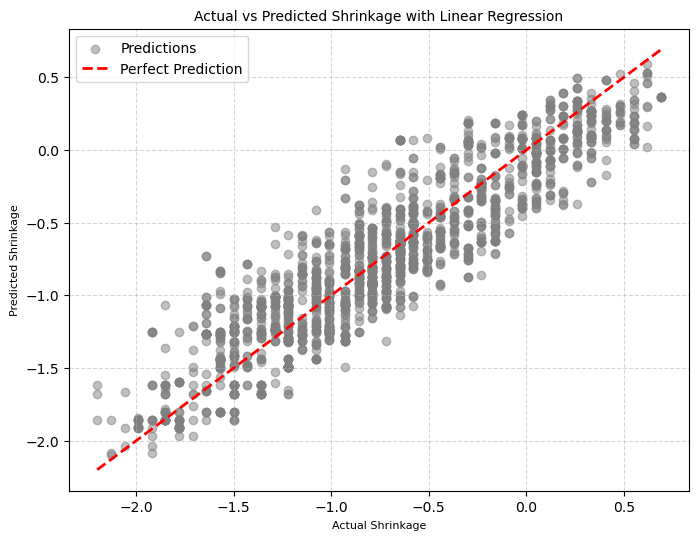

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='grey', label='Predictions')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Shrinkage', fontsize=8)
plt.ylabel('Predicted Shrinkage', fontsize=8)
plt.title('Actual vs Predicted Shrinkage with Linear Regression', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

##### [5.4] Regularization method of your choosing, such as LASSO or ridge regression. Use the regularized model to make predictions on the holdout data. Compute the MAE and the RMSE.

In [90]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1, max_iter=10000, random_state=42)

In [92]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [94]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

print(f"Mean Absolute Error (MAE):", mae_lasso)
print(f"Root Mean Squared Error (RMSE):", rmse_lasso)

Mean Absolute Error (MAE): 0.2686008766278744
Root Mean Squared Error (RMSE): 0.33718300513779753


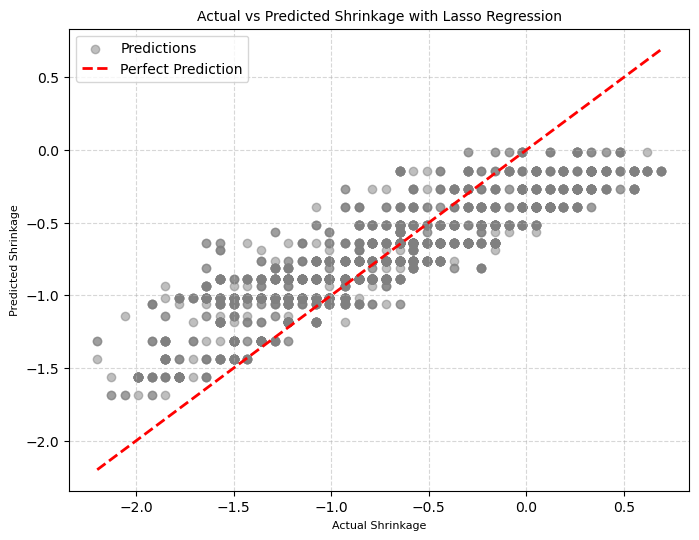

In [96]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='grey', label='Predictions')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Shrinkage', fontsize=8)
plt.ylabel('Predicted Shrinkage', fontsize=8)
plt.title('Actual vs Predicted Shrinkage with Lasso Regression', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

##### [Problem 6] Logistic Regression Extended
Suppose you ran a logistic regression algorithm
on the dataset and obtained the following coefficients for class yes:
Coefficient of A1 = 0.045
Coefficient of A2 = 0.003
Intercept = -3.485
Classify the following two unseen objects using the above model:
O1: A1 = 47, A2 = 213
O2: A1 = 65, A2 = 276
Assume that the classification threshold is 0.5.

In [99]:
#what is given
coeff_A1 = 0.045
coeff_A2 = 0.003
intercept = -3.485

#classify
def classify_unseen(A1, A2, intercept, coeff_A1, coeff_A2, threshold=0.5):
    #first we compute the linear score
    z = intercept + (coeff_A1 * A1) + (coeff_A2 * A2)

    #probability
    p = (1)/(1+np.exp(-z))

    #classify
    if p > threshold:
        classification = "yes"
    else:
        classification = "no"

    return p, classification

#what we want to classify
O1 = (47, 213)
O2 = (65, 276)

# Classify O1
p1, label1 = classify_unseen(O1[0], O1[1], intercept, coeff_A1, coeff_A2)
print(f"O1(47,213): Probability = {p1:.4f}, Classified as: {label1}")

# Classify O2
p2, label2 = classify_unseen(O2[0], O2[1], intercept, coeff_A1, coeff_A2)
print(f"O2(65,276): Probability = {p2:.4f}, Classified as: {label2}")

O1(47,213): Probability = 0.3250, Classified as: no
O2(65,276): Probability = 0.5666, Classified as: yes
